1. [Amazon Aurora](#amazon-aurora)
2. [Aurora High Availability & Read Scaling](#aurora-high-availability--read-scaling)
3. [How to create Aurora MySQL DB](#how-to-create-aurora-mysql-db)
4. [Check created Aurora DB](#check-created-aurora-db)
5. [Add new reader to DB](#add-new-reader-to-db)
6. [Clone DB](#clone-db)
7. [Restore DB](#restore-db)
8. [Cross region Read replica](#cross-region-read-replica)
9. [Read Replica Auto scaling](#read-replica-auto-scaling)
10. [Add AWS Region into DB cluster](#add-aws-region-into-db-cluster)
11. [Delete Aurora RDS](#delete-aurora-rds)
12. [RDS & Aurora Security](#rds--aurora-security)
13. [Amazon RDS Proxy](#amazon-rds-proxy)


#### Amazon Aurora:
- Its a proprietary technology of AWS
- Postgres and MySQL are supported as Aurora DB.
- Storage grows automatically by 10gb up to 128gb
- Supports up to 15 read replicas and replication is faster than MySQL
- Failover in instantaneous, high availability
- Aurora cost 20% more than RDS, but its efficient

#### Aurora High Availability & Read Scaling:
- 6 copies of your data across 3 AZ's
    - 4 copies out of 6 for writes
    - 3 copies out of 6 for reads
    - self healing with peer-peer evaluation (if any bad data)
    - storage is stripped across 100's of volumes
- One aurora instance takes writes (master)
    - if master failed, failover works in 30 seconds
- Up to 15 read replicas + Master
- Supports cross region replication

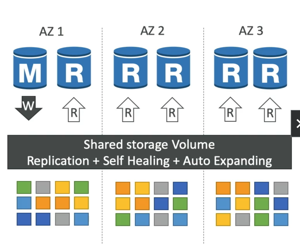

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/AmazonAurora.jpeg')
new_image = img.resize((300, 250))
display(new_image)

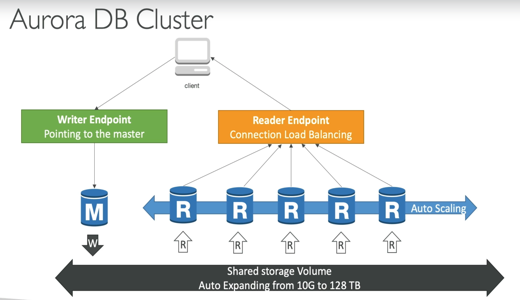

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/aurora2.jpeg')
new_image = img.resize((520, 300))
display(new_image)

#### How to create Aurora MySQL DB:
- Go to RDS console
- Click on "Create database"
    - Select engine options
        - Aurora MySQL
        - Choose the version 
        - Choose templates
            - Production
            - Dev/Test
        - Settings
            - DB identifier
            - username
            - password
        - Cluster storage configuration
            - Standard
            - I/O optimized
        - Instance configuration
            - burstable classes (handle abrupt spikes in CPU performance above a threshold value)
            - memory optimized
            - serverless V2
                - min & max ACU (Aurora capacity units)
        - Availability & durability
            - Multi-AZ deployment
        - Connectivity
            - Compute resource
                - connect to EC2 instance
                - do not connect to EC2 instance
            - Network type
                - IP V4
                - Dual Stack mode
            - VPC
            - subnet group
            - Public access
            - VPC security group
                - create new
                    - name
            - RDS proxy
                - helps applications to pool and share connections established with the database for scalability, resilience and security
            - Certificate authority 
                - server certificate installed within the database provides extra layer of security
            - Database port
        - Read replica writes forwarding 
            - when writes are assigned to read replica, it will forward the request to writes master instance
        - Database authentication
            - IAM
            - Kerberos Authentication
        - Monitoring
        - Additional configuration
            - DB name
            - failover priority
            - db cluster parameter group
            - db parameter group
            - backup
                - retention -> 1 day default
            - backtrack (rewind the database back to a specific point in time instead of creating a new DB)
            - log exports
            - maintenance
            - deletion protection

#### Check created Aurora DB:
- In RDS console
    - In Database option, we find the database created
    - We will find reader and writer instance under regional cluster

#### Add new reader to DB:
- In RDS console
- Select the db
- Go to Action option
- Choose Add reader


#### Clone DB:
- In RDS console
- Select the db
- Go to Action option
- Choose create clone


#### Restore DB:
- In RDS console
- Select the db
- Go to Action option
- Choose restore point in time


### Cross region Read replica:
- In RDS console
- Select the db
- Go to Action option
- Choose Cross region Read replica


### Read Replica Auto scaling:
- In RDS console
- Select the db
- Go to Action option
- Choose replica auto scaling
    - Policy name
    - Target Metric
        - Avg. connections / Avg. CPU utilization
    - IAM role
    - Target Value
    - Additional configuration
        - scaling policy
            - cool down period
    - cluster capacity
        - min & max read replicas

#### Add AWS Region into DB cluster:
- Make sure to check Aurora instance for the created DB is part of the Aurora Global databases
- If not, its not possible to add region into the DB cluster but we can modify and choose the apt instance to enable this feature

### Delete Aurora RDS:
- First delete the read replicas
- Then delete the write replicas
- Then the regional cluster will be deleted automatically


### RDS & Aurora Security:
- At-rest encryption:
    - DB master and replicas encryption using KMS must be defined at launch time
    - if master not encrypted then read replicas will also not be encrypted
    - To encrypt an unencrypted DB, then go through DB snapshot and restore as encrypted

- In-flight encryption:
    - TLS ready by default, use AWS TLS root certificates client side

- IAM Authentication:
    - instead of username & password use IAM roles to connect to DB

- Security Groups
    - control network access to DB

- No SSH access, except custom RDS

- Audit logs can be enabled and sent to cloudwatch logs for troubleshooting for longer retention


### Amazon RDS Proxy:
- Fully managed proxy for DB
- Allows App to pool and share connections established with the DB
- Improving efficiency by reducing stress on the DB and minimize open connections
- serverless auto scaling, highly unavailable
- reduced failover time for RDS and Aurora by 66%
- Enforces IAM authentication for DB (AWS secrets manager)
- RDS proxy is not publicly access (only within VPC)

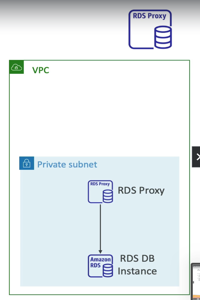

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('aurora3.jpeg')
new_image = img.resize((200, 300))
display(new_image)